In [210]:
import pandas as pd
import numpy as np 
from pandas.api.types import CategoricalDtype
from datetime import datetime 
import pandas as pd
import numpy as np 
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

## movies metadata file cleaning

In [404]:
movies_df = pd.read_csv("Data/movies_metadata.csv")

/var/folders/j1/rhs6cm1s6r33j2qkcxx0f8kr0000gn/T/ipykernel_19062/2760051603.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv("Data/movies_metadata.csv")


In [405]:
movies_df.shape

(45466, 24)

In [406]:
movies_df.index.min()
movies_df.index.max()

45465

In [407]:
data_df = movies_df.drop(columns = ["adult","belongs_to_collection","homepage" ,"tagline","status","production_companies","production_countries",
                         "revenue","video"] , inplace= False)

In [408]:
data_df.isnull().sum()

budget                 0
genres                 0
id                     0
imdb_id               17
original_language     11
original_title         0
overview             954
popularity             5
poster_path          386
release_date          87
runtime              263
spoken_languages       6
title                  6
vote_average           6
vote_count             6
dtype: int64

In [409]:
data_df[data_df['vote_average'].isnull()] = 0
data_df[data_df['vote_count'].isnull()] = 0

In [410]:
data_df.isnull().sum()

budget                 0
genres                 0
id                     0
imdb_id               17
original_language     11
original_title         0
overview             954
popularity             0
poster_path          383
release_date          84
runtime              257
spoken_languages       0
title                  0
vote_average           0
vote_count             0
dtype: int64

In [411]:
data_df.drop(columns="budget" , inplace=True)

In [412]:
data_df.isnull().sum()

genres                 0
id                     0
imdb_id               17
original_language     11
original_title         0
overview             954
popularity             0
poster_path          383
release_date          84
runtime              257
spoken_languages       0
title                  0
vote_average           0
vote_count             0
dtype: int64

In [413]:
data_df['overview']= data_df['overview'].fillna(data_df['title'])

In [414]:
data_df[data_df['runtime'].isnull()] = data_df['runtime'].mean()

In [415]:
data_df.drop(columns="poster_path" , inplace=True)

In [416]:
data_df.isnull().sum()

genres                0
id                    0
imdb_id              15
original_language    11
original_title        0
overview              0
popularity            0
release_date         73
runtime               0
spoken_languages      0
title                 0
vote_average          0
vote_count            0
dtype: int64

In [417]:
data_df["original_language"] = data_df['original_language'].fillna(data_df.spoken_languages[1])


In [418]:
data_df.head()

,genres,id,imdb_id,original_language,original_title,overview,popularity,release_date,runtime,spoken_languages,title,vote_average,vote_count
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men,6.5,92.0
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Waiting to Exhale,6.1,34.0
4,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,1995-02-10,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Father of the Bride Part II,5.7,173.0


In [419]:
data_df.isnull().sum()

genres                0
id                    0
imdb_id              15
original_language     0
original_title        0
overview              0
popularity            0
release_date         73
runtime               0
spoken_languages      0
title                 0
vote_average          0
vote_count            0
dtype: int64

In [420]:
data_df = data_df[pd.to_datetime(data_df["release_date"],errors='coerce').notnull()]
data_df['release_date'] = pd.to_datetime(data_df['release_date'])


In [421]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45393 entries, 0 to 45465
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genres             45393 non-null  object        
 1   id                 45393 non-null  object        
 2   imdb_id            45381 non-null  object        
 3   original_language  45393 non-null  object        
 4   original_title     45393 non-null  object        
 5   overview           45393 non-null  object        
 6   popularity         45393 non-null  object        
 7   release_date       45393 non-null  datetime64[ns]
 8   runtime            45393 non-null  float64       
 9   spoken_languages   45393 non-null  object        
 10  title              45393 non-null  object        
 11  vote_average       45393 non-null  float64       
 12  vote_count         45393 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(9)
memory usage: 4.8

In [422]:
data_df[data_df['release_date'].isnull()] = data_df['release_date'].mean()

In [423]:
data_df.isnull().sum()

genres                0
id                    0
imdb_id              12
original_language     0
original_title        0
overview              0
popularity            0
release_date          0
runtime               0
spoken_languages      0
title                 0
vote_average          0
vote_count            0
dtype: int64

In [424]:
data_df[data_df['imdb_id'].isnull()] = "Unknown"

In [425]:
#sanity check
data_df.isnull().sum()

genres               0
id                   0
imdb_id              0
original_language    0
original_title       0
overview             0
popularity           0
release_date         0
runtime              0
spoken_languages     0
title                0
vote_average         0
vote_count           0
dtype: int64

In [426]:
data_df.head(1)

,genres,id,imdb_id,original_language,original_title,overview,popularity,release_date,runtime,spoken_languages,title,vote_average,vote_count
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30 00:00:00,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0


Changing name of the `id` col to `movieID` to join the review table with movies.

In [267]:
movies =data_df.rename(columns = {'id' : 'movieId'})

## ratings file cleaning

In [263]:
ratings_df = pd.read_csv("Data/ratings.csv")

In [264]:
ratings_df.head(2)

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817


In [265]:
#we're gonna drop the timestamp col
ratings_df.drop(columns = "timestamp", inplace=True)

In [266]:
ratings_df.isnull().sum()

userId     0
movieId    0
rating     0
dtype: int64

In [270]:
ratings_df

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5
2,1,307,5.0
3,1,665,5.0
4,1,899,3.5
...,...,...,...
25000090,162541,50872,4.5
25000091,162541,55768,2.5
25000092,162541,56176,2.0
25000093,162541,58559,4.0


In [271]:
ratings_df['liked'] =ratings_df['rating'].apply(lambda x: 1 if x > 3.5 else 0)


In [272]:
ratings_df

,userId,movieId,rating,liked
0,1,296,5.0,1
1,1,306,3.5,0
2,1,307,5.0,1
3,1,665,5.0,1
4,1,899,3.5,0
...,...,...,...,...
25000090,162541,50872,4.5,1
25000091,162541,55768,2.5,0
25000092,162541,56176,2.0,0
25000093,162541,58559,4.0,1


We're going to take samples (balanced smaple) the data is pretty imbalance between `liked` and `not liked` groups and then 

In [279]:
liked_group_reviews = ratings_df[ratings_df['liked'] == 1].sample(frac=0.08)

In [280]:
liked_group_reviews

,userId,movieId,rating,liked
6984929,45296,62,5.0,1
1362104,9172,858,5.0,1
24719216,160657,292,4.0,1
7609873,49385,1282,4.0,1
17859205,115810,51088,4.0,1
...,...,...,...,...
8251801,53707,953,4.5,1
12544334,81124,1333,4.5,1
10313536,66904,1050,5.0,1
9165785,59732,2194,4.0,1


In [289]:
not_liked_group_reviews=ratings_df[ratings_df['liked'] == 0].sample(frac=0.8)

In [290]:
not_liked_group_reviews

,userId,movieId,rating,liked
15945962,103342,107406,3.0,0
17036870,110474,34048,2.5,0
10054503,65236,80219,3.0,0
23512371,152665,4005,3.5,0
9157663,59657,68157,3.0,0
...,...,...,...,...
19449258,126249,231,3.5,0
19506752,126637,8596,2.5,0
3598060,23733,54272,3.0,0
6005314,38906,785,3.5,0


In [314]:
sample_ratings = pd.concat([liked_group_reviews,not_liked_group_reviews])

In [315]:
sample_ratings

,userId,movieId,rating,liked
6984929,45296,62,5.0,1
1362104,9172,858,5.0,1
24719216,160657,292,4.0,1
7609873,49385,1282,4.0,1
17859205,115810,51088,4.0,1
...,...,...,...,...
19449258,126249,231,3.5,0
19506752,126637,8596,2.5,0
3598060,23733,54272,3.0,0
6005314,38906,785,3.5,0


In [316]:
reviews_per_user = sample_ratings.groupby("userId")['movieId'].count()

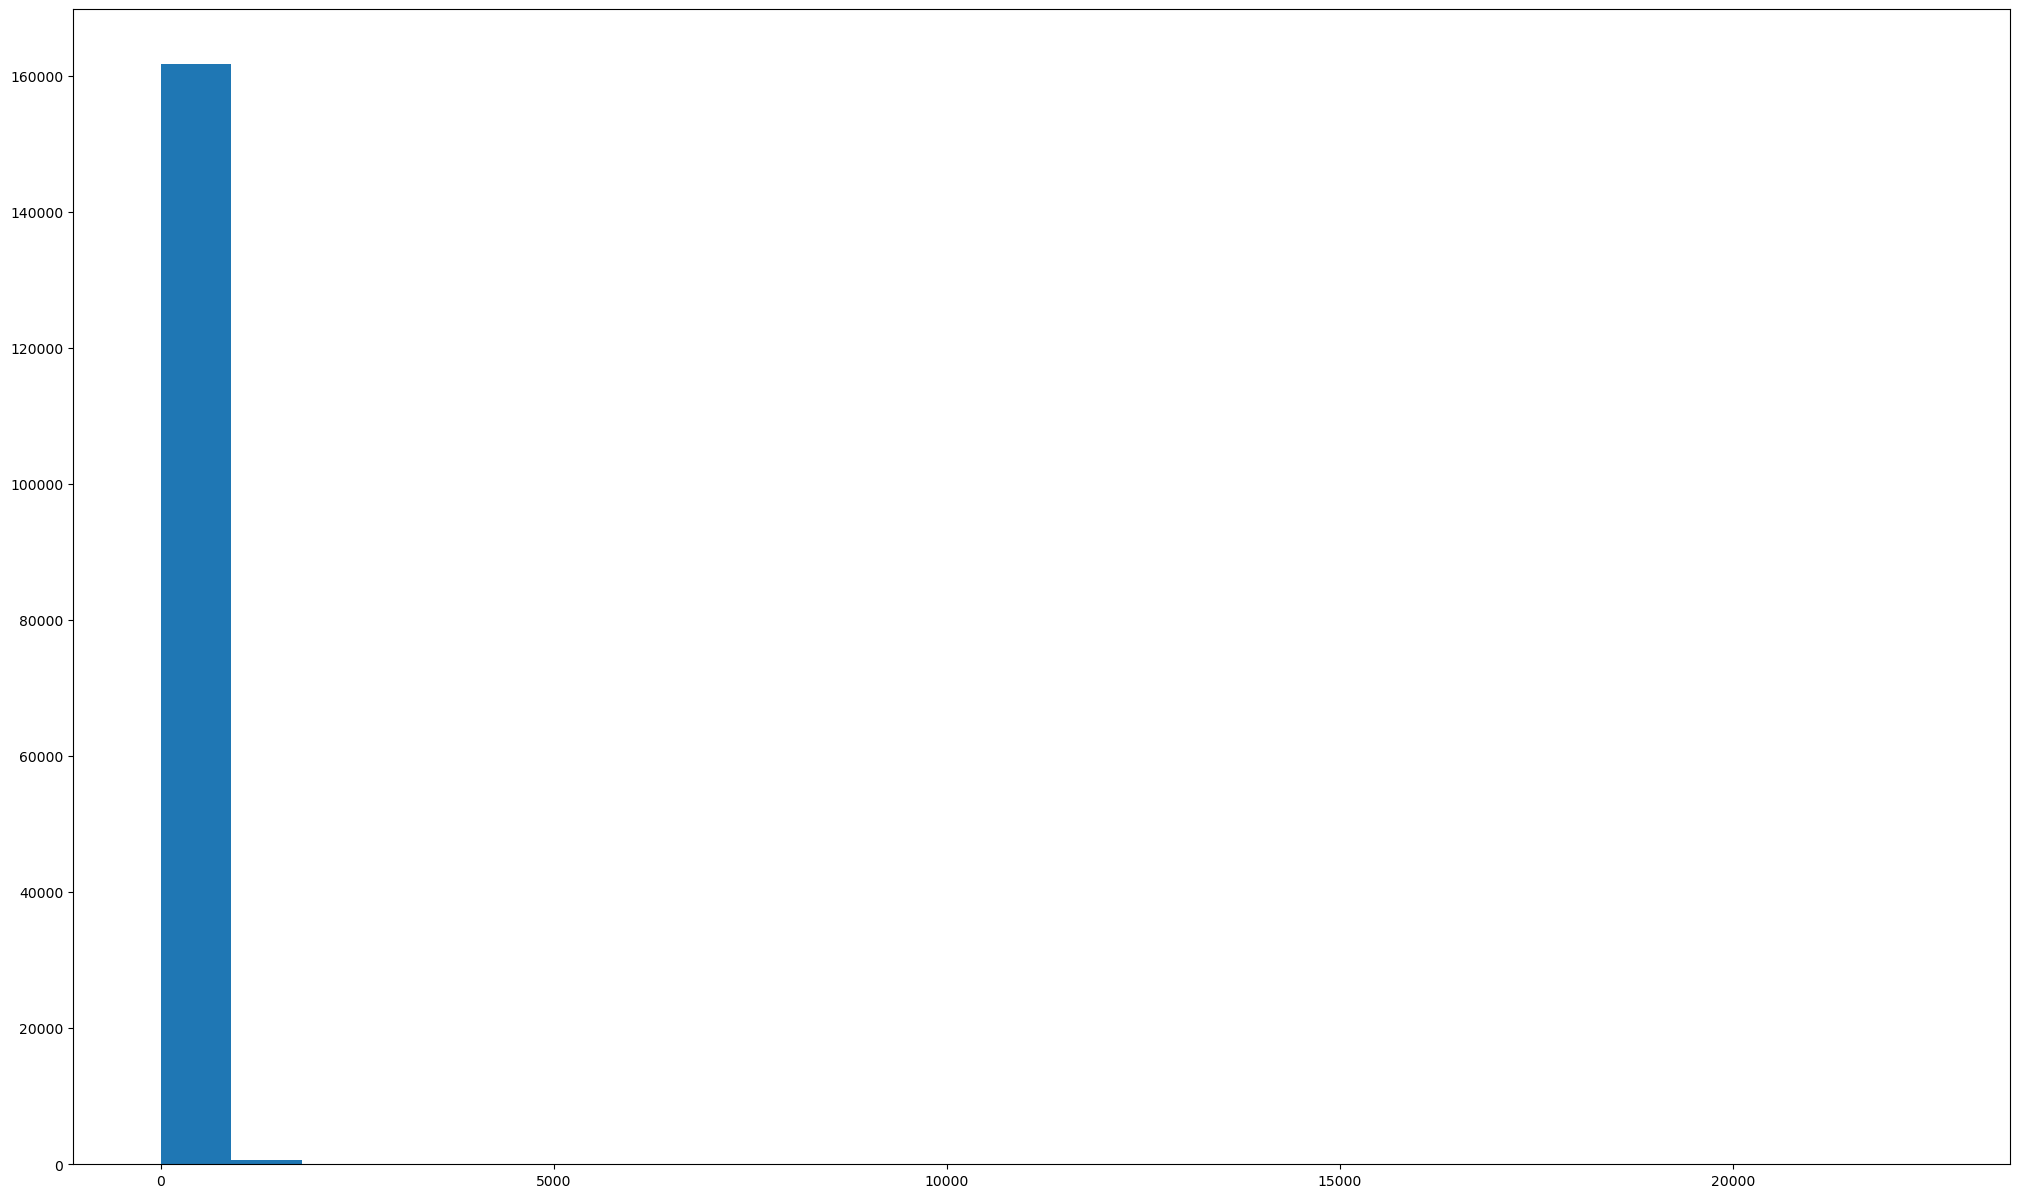

In [317]:

plt.figure(figsize=(25,15))
plt.hist(reviews_per_user,bins=25)
plt.show()

In [318]:
reviews_per_user.index
# we want to keep the ones who have rated more than 50 movies

Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            162532, 162533, 162534, 162535, 162536, 162537, 162538, 162539,
            162540, 162541],
           dtype='int64', name='userId', length=162430)

In [319]:
reviews_per_user = reviews_per_user[reviews_per_user>50]

In [320]:
reviews_per_user.index

Int64Index([     2,      3,      4,      8,      9,     12,     13,     18,
                19,     23,
            ...
            162515, 162516, 162519, 162521, 162524, 162529, 162533, 162534,
            162538, 162541],
           dtype='int64', name='userId', length=48783)

In [339]:
sample_ratings = sample_ratings[sample_ratings['userId'].isin(reviews_per_user.index)]

In [344]:
sample_ratings =sample_ratings.sort_index()

In [345]:
sample_ratings

,userId,movieId,rating,liked
71,2,62,0.5,0
78,2,266,1.0,0
80,2,333,5.0,1
84,2,380,1.0,0
91,2,553,2.0,0
...,...,...,...,...
25000082,162541,8610,2.5,0
25000083,162541,8905,3.0,0
25000088,162541,41566,4.0,1
25000091,162541,55768,2.5,0


That leaves us with ~88k reviews.

In [346]:
#im gonna save it in a csv file
ratings_sample.to_csv("Data/ratings_sample.csv")

### back to movies dataframe

In [429]:
# movies['spoken_languages'] = movies['spoken_languages'].astype('str')

In [350]:
# lang_list=[]
# for lang in movies['spoken_languages']:
#     lang = lang.strip("[").strip("]")
#     lang_list.append(lang.split(','))


In [351]:
# languages = [] #list of lists


# for i in range(len(lang_list)):
    
#     ls=[] #list of dicts
    
#     for item in lang_list[i]:
#         temp = {}
#         item = item.replace("'", "").replace("{", "").replace("}", "")
#         if len(item.split(":"))==2:
#             key, value = item.split(":")
#             key = key.strip()
#             value = value.strip()
#             temp[key] = value
   
#             ls.append(temp)
#     languages.append(ls)      

In [433]:
movies.shape

(45381, 144)

In [354]:
# langs =[]
# for i in range(len(languages)):
#     temp =[]
    
#     for idx,dct in enumerate(languages[i]):
        
#         for key,val in dct.items():
#             if key =='name':
#                 temp.append(val)
                
   
#     #list of temps
#     langs.append(temp)
  
# movies['language'] = langs
# movies['lang_list'] = langs

In [355]:
#converting language column from list ot strings
# movies['language'] = [','.join(map(str, l)) for l in movies['language']]


In [356]:
#dropping the spoken languages col
# movies.drop(columns = 'spoken_languages',inplace=True)

In [ ]:
movies['genres'] = movies['genres'].astype("str")

In [359]:
genre_list=[]
for genre in movies['genres']:
    genre = genre.strip("[").strip("]")
    genre_list.append(genre.split(','))


In [360]:
result = [] #list of lists


for i in range(len(genre_list)):
    
    ls=[] #list of dicts
    
    for item in genre_list[i]:
        temp = {}
        item = item.replace("'", "").replace("{", "").replace("}", "")
        if len(item.split(":"))==2:
            key, value = item.split(":")
            key = key.strip()
            value = value.strip()
            temp[key] = value
   
            ls.append(temp)
    result.append(ls)        
        

In [361]:
len(genre_list)

45393

In [362]:
len(result)

45393

In [364]:
genres_names = []
for item in result:
    for dct in item:
        if 'name' not in dct.keys():
            item.remove(dct)
        

In [365]:
gen_list = []
for item in result:
    genres = []
    for dct in item:
        k,val = list(dct.items())[0]
        genres.append(val)
        
    gen_list.append(genres)
    


In [366]:
len(gen_list)

45393

In [368]:
movies['genre']=gen_list

In [435]:
movies['genre']

0         [Animation, Comedy, Family]
1        [Adventure, Fantasy, Family]
2                   [Romance, Comedy]
3            [Comedy, Drama, Romance]
4                            [Comedy]
                     ...             
45460        [Drama, Action, Romance]
45462                         [Drama]
45463       [Action, Drama, Thriller]
45464                              []
45465                              []
Name: genre, Length: 45381, dtype: object

In [370]:
#dropping `genres` col
movies.drop(columns="genres" , inplace=True)

In [436]:
dummies_df = pd.get_dummies(movies['genre'].apply(pd.Series), prefix='', prefix_sep='').groupby(level=0).sum(numeric_only=True, min_count=0)



/var/folders/j1/rhs6cm1s6r33j2qkcxx0f8kr0000gn/T/ipykernel_19062/2943367366.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dummies_df = pd.get_dummies(movies['genre'].apply(pd.Series), prefix='', prefix_sep='').groupby(level=0).sum(numeric_only=True, min_count=0)


In [437]:
dummies_df

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,...,Family,Foreign,Music,Romance,Science Fiction,Thriller,Western,Comedy,Family,Thriller
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45460,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45462,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45463,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45464,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
movies = movies.join(dummies_df)

In [374]:
movies.isna().sum().sum()

0

In [376]:
len(movies[movies['original_language'] == 'en'].values)

32187

model_movies_df

In [59]:
# genres_vote_count.to_csv("genres_vote_count.csv")

In [377]:
lang_s = movies["lang_list"]

In [378]:
movies.drop(columns= 'lang_list',inplace=True)

In [379]:
# lang_stacked.to_csv("language_count.csv")

In [380]:
movies.to_csv("movies.csv" , index= False)
#saving cleaned movies and ready to work on 

In [388]:
idx = movies[movies['vote_count'] == 'Unknown'].index
movies.drop(idx, inplace=True)

In [395]:
movies['vote_count']

0        5415.0
1        2413.0
2          92.0
3          34.0
4         173.0
          ...  
45460      26.0
45462       3.0
45463       6.0
45464       0.0
45465       0.0
Name: vote_count, Length: 45381, dtype: object

In [444]:
count_per_movie = movies.groupby("movieId")['vote_count'].sum()

In [445]:
count_per_movie

movieId
0                            0.0
94.1157070494813    24187.736712
100                       1671.0
10000                        9.0
10001                       46.0
                        ...     
99946                        2.0
9995                         5.0
9997                        77.0
99977                        6.0
9999                        11.0
Name: vote_count, Length: 45090, dtype: object

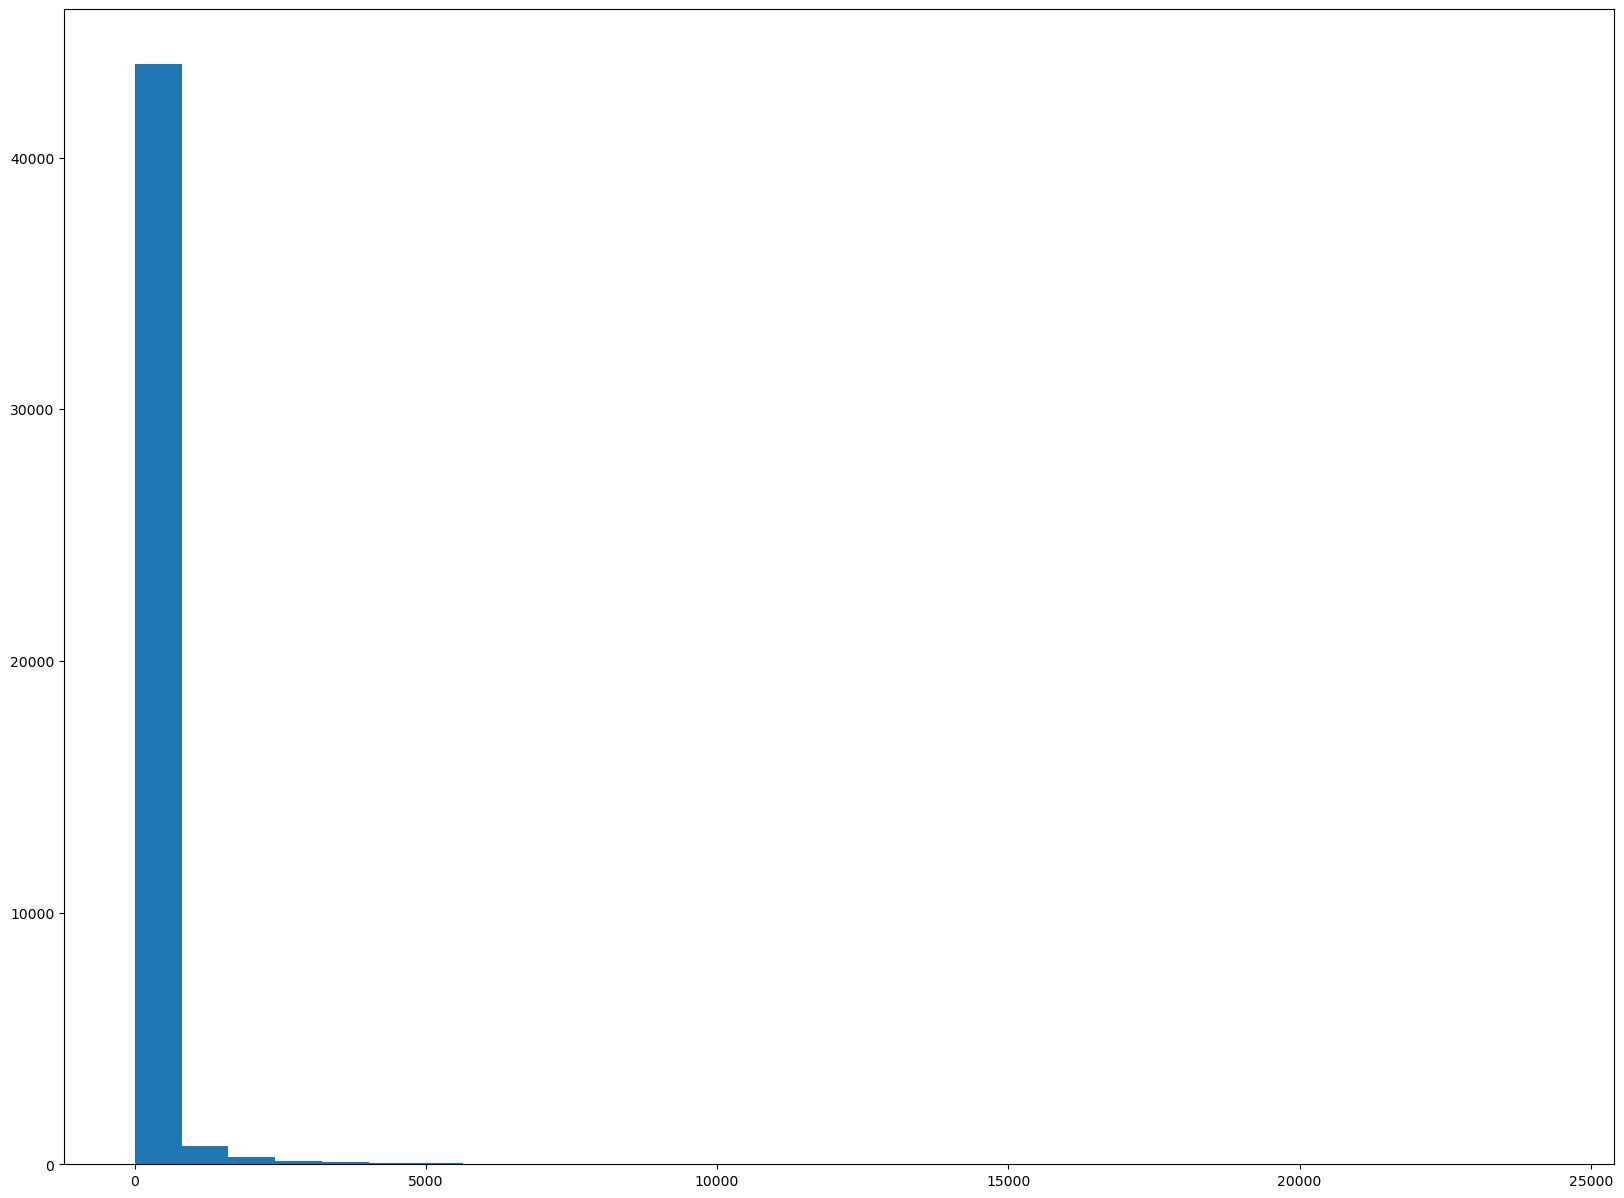

In [446]:
plt.figure(figsize=(20,15))
plt.hist(count_per_movie,bins=30)
plt.show()

In [449]:
count_per_movie= count_per_movie[count_per_movie>100]


In [450]:
count_per_movie

movieId
94.1157070494813    24187.736712
100                       1671.0
10003                      310.0
100042                    1140.0
10007                      146.0
                        ...     
9988                       173.0
9989                       156.0
9991                       158.0
9992                       663.0
9994                       334.0
Name: vote_count, Length: 6019, dtype: object

This leaves us with 6k movies(which have above 100 reviews)

In [451]:
movies = movies[movies['movieId'].isin(count_per_movie.index)]

In [453]:
movies.to_csv("Data/movies.csv")

In [73]:
tfidf = TfidfVectorizer(analyzer = 'word' , stop_words='english',min_df=0,ngram_range=(1,2))

In [74]:
#sanity check on the matrix
# tfVec_matrix.shape

In [ ]:
def common_movies(user1,user2):
    movies=[]
    movies_id = [id for id in ratings_sample[ratings_sample['userId']==user1]['movieId'] if id in ratings_sample[ratings_sample['userId']==user2]['movieId']]
    # for id in movies_id:
    #     movies.append(movies_df[movies_df['movieId'] == id]['title']) 
    # return movies
    return movies_id
  

In [ ]:
#need to calculate the cosine similarity between the liked movies on users
def get_common_liked_movie(user1,user2):
    cm = common_movies(user1,user2)
    liked_by_user1 = ratings_sample[ (ratings_sample['userId']==11) & (ratings_sample['liked']==1) ]['movieId']
    liked_by_user2 = ratings_sample[(ratings_sample['userId']==22) & (ratings_sample['liked']==1)]['movieId']
    liked_movies=[]
    liked_titles=[]
    movies_id = [movie_id for movie_id in cm]
    for id in movies_id:
        if id in ((liked_by_user1) & (liked_by_user2)):
            
            liked_movies.append(id)

    for id in liked_movies:   
            liked_titles.append(movies_df[movies_df['movieId'] == id]['title'])
    return liked_titles

In [1]:
def get_liked_movies_info(movie_title):
    title = movie_title
    genre = movies_df[movies_df['movieId']==title]['genre']
    lang = movies_df[movies_df['movieId']==title]['original_language']
    runtime = movies_df[movies_df['movieId']==title]['runtime']
    

In [ ]:
#Now I'm going to vectorize the overview words.
# translator = Translator()
# def translate_non_english(text):
#     try:
#         if translator.detect(text).lang != 'en':
#             return translator.translate(text).text
#     except AttributeError:
#         pass  # Handle attribute error and return the original text
#     return text
# # Apply translation function to 'overview' column
# movies_df['overview'] = movies_df['overview'].apply(translate_non_english)

In [ ]:

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english',min_df=0,ngram_range=(1,2))

#Replace NaN with an empty string
movies_df['overview'] = movies_df['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(movies_df['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's linear_kernel() instead of cosine_similarities() since it is faster.

In [ ]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
# Function that takes in movie title as input and outputs most similar movies based on oveerview
def get_recommendations(title, cosine_sim=cosine_sim):
    
    # Get the index of the movie that matches the title
    idx = indices[title]
    print(idx)
    print()
    movie_indices =[]
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    
    # Sort the movies based on the similarity scores

    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices=[i[0] for i in sim_scores]
        
    # Return the top 10 most similar movies
    return movies_df['title'].iloc[movie_indices]
get_recommendations('Batman')